In [1]:
%matplotlib inline
import os
import pandas as pd
from pyerman.style import colorTable
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

/Users/wier702/.virtualenvs/notebook/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Define globals
### network name <=> data file mapping
_FILEMAP_={'vgg16a' : 'sp_vgg16a_iter_',
           'vgg16b' : 'sp_vgg16b_iter_',
           'vgg16c' : 'sp_vgg16c_iter_',
           'resnet14b'    : 'sp_resnet14b_iter_',
           'resnet14b_w4' : 'sp_resnet14b_w4_iter_',
           'resnet29b'    : 'sp_resnet29b_iter_',
           'resnet29b_w2' : 'sp_resnet29b_w2_iter_',
           'resnet29b_w4' : 'sp_resnet29b_w4_iter_',
           'resnet50b'    : 'sp_resnet50b_iter_',
           'plainresnet10b'    : 'sp_plainresnet10b_iter_',
           'plainresnet10b_w4' : 'sp_plainresnet10b_w4_iter_',
           'plainresnet12b'    : 'sp_plainresnet12b_iter_',
           'plainresnet18b'    : 'sp_plainresnet18b_iter_',
           'plainresnet18b_w4' : 'sp_plainresnet18b_w4_iter_',
           'plainresnet20b'    : 'sp_plainresnet20b_iter_',
           'plainresnet20b_w4' : 'sp_plainresnet20b_w4_iter_'
          }
_DATAMAP_={}
_FILEDIR_='testA'
_LABELS_=['eminus','gamma','muminus','piminus','proton']

In [3]:
class Analysis:
    """
        Class encapsulation of purity analysis routines
    """
    total_file_list = os.listdir(_FILEDIR_)
    labels_to_check=['energy_dep','energy_start','mass','mom_start','dcosx_start',
                     'dcosy_start','dcosz_start','nparticle','ndecay','npx']
    
    def __init__(self, netname):
        """
            A single instance corresponds to a single network
        """
        self.netname = netname
        self._iter_files=None
        self._iter_map ={}

    @property
    def iter_files(self):
        """
            Gets a list of all files corresponding to this network
        """
        if self._iter_files is not None: return self._iter_files
        return [i for i in self.total_file_list if self.netname in i]
        
    @property
    def iter_map(self):
        """
            Returns a  map of iteration->iteration file
        """
        if len(self._iter_map)>0: return self._iter_map
        for i in self.iter_files:
            self._iter_map[int(i.strip('.csv').split("_")[-1])]= os.path.join(_FILEDIR_,i)
        return self._iter_map
    
    @property
    def iter_sorted(self):
        """
            Returns a sorted list of iterations
        """
        return [key for key in sorted(self.iter_map.iterkeys())]
    
    def df(self, iteration):
        """
            Get the dataframe for a specific iteration
        """
        return pd.read_csv(self.iter_map[iteration], error_bad_lines=False)
    
    def __repr__(self):
        return """
               Purity Analysis on Network: {}
               Iterations: {}
               """.format(self.netname, self.iter_sorted)

    def analyze(self):
        """
            Create a plot of Pearson's R to iteration number.
        """
        results={
            'name': self.netname,
            'iter':[]
        }
        for label in self.labels_to_check:
            results[label]=[]
        
        for iteration in self.iter_sorted:          
            df = self.df(iteration)            
        
            correct_values = df.query('label==prediction')
            incorrect_values = df.query('label!=prediction')
            ones = [True for i in range(len(correct_values))]
            zeroes = [False for i in range(len(incorrect_values))]
            x = np.append(ones, zeroes)
            results['iter'].append(iteration)
            for label in self.labels_to_check:
                cv_label = getattr(correct_values, label).values
                icv_label = getattr(incorrect_values, label).values
                y = np.append(cv_label , icv_label )
                r,p = stats.pointbiserialr(x, y)
                results[label].append(r)
            
        return results
    def make_plots(self):
        pass
        """
            Creates all the necessary plots for this analysis
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        results = self.analyze()
        for index, iteration in enumerate(results):
            plt.plot(results[iteration]['purity'], results[iteration]['efficiency'],
                    marker='o', label="Iteration File: {}".format(iteration)
                    )
        #plt.tick_params(labelsize=20)
        plt.grid()
        plt.ylabel('Efficiency',fontweight='bold')
        plt.xlabel('Purity',fontweight='bold')
        plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
        #leg_frame=leg.get_frame()
        #leg_frame.set_facecolor('white')
        plt.title('Electron Selection Efficiency/Purity For Network: {}'.format(self.netname))
        plt.tight_layout()
        plt.show()    
        """

In [4]:
analyses = [Analysis(i) for i in _FILEMAP_ ]
#print analyses

In [5]:
analysis_results = [i.analyze() for i in analyses if len(i.iter_sorted)>0]
names = [i.netname for i in analyses]

/Users/wier702/.virtualenvs/notebook/lib/python2.7/site-packages/scipy/stats/stats.py:3029: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/Users/wier702/.virtualenvs/notebook/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/wier702/.virtualenvs/notebook/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/wier702/.virtualenvs/notebook/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/Users/wier702/.virtualenvs/notebook/lib/python2.7/site-packages/scipy/stats/stats.py:3029: RuntimeWarning: invalid value encountered in true_divide
  r = r_num / r_den
Skipping line 7045: expected 18 fields, saw 19

Skipping line 7045: expected 18 fields, saw 19

Ski

In [6]:
#[i.make_plots() for i in analyses if len(i.iter_sorted)>0]

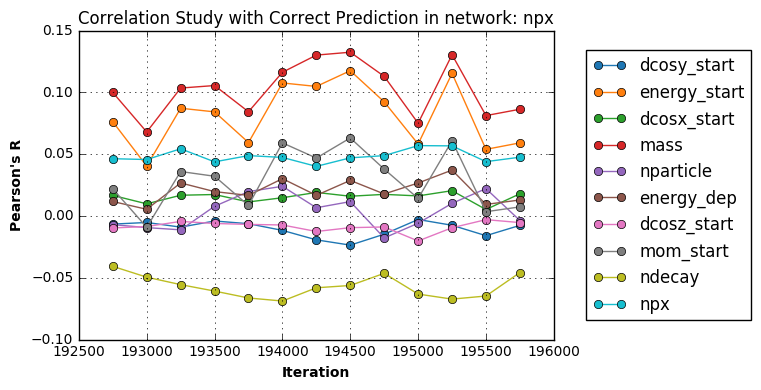

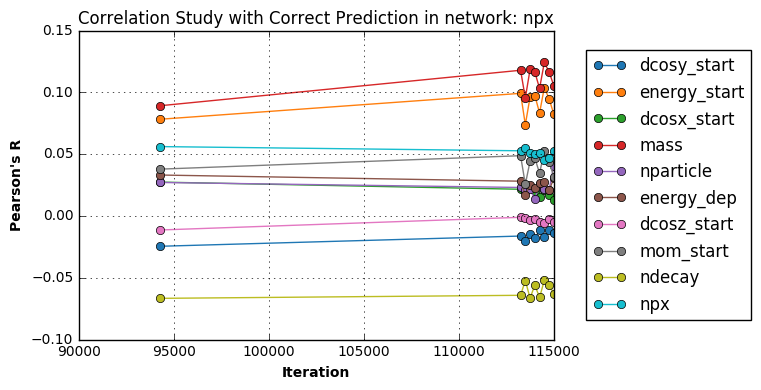

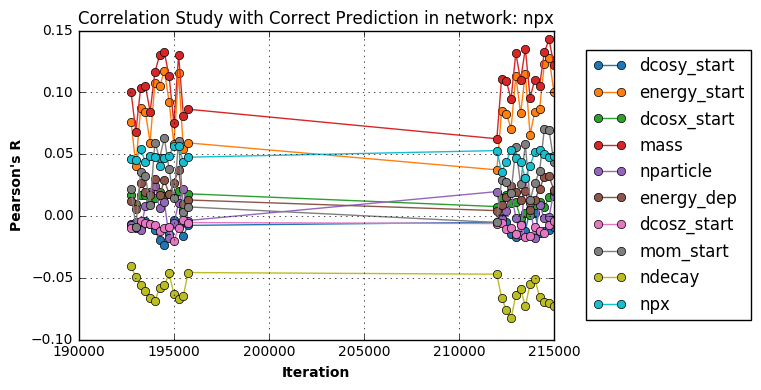

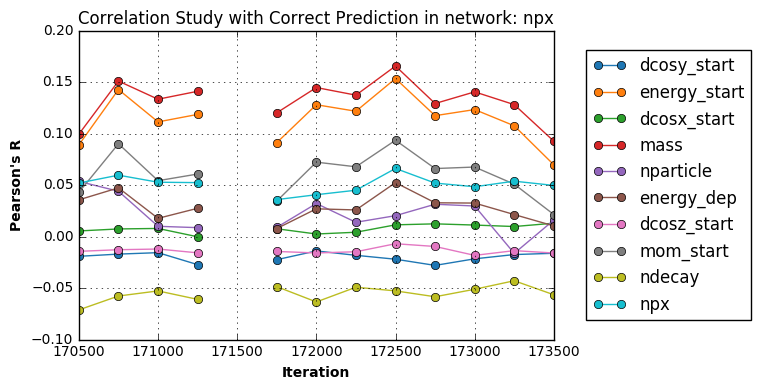

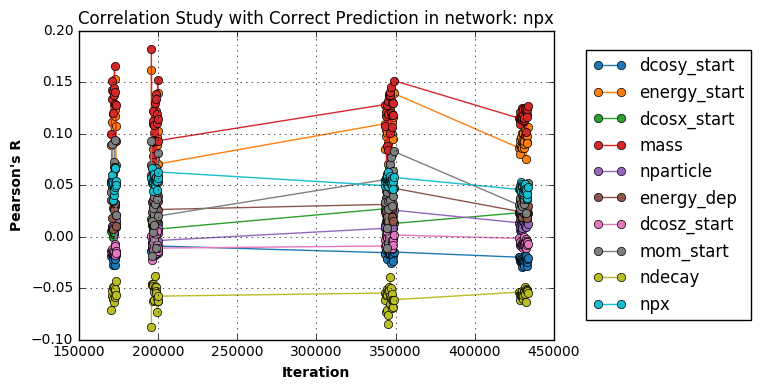

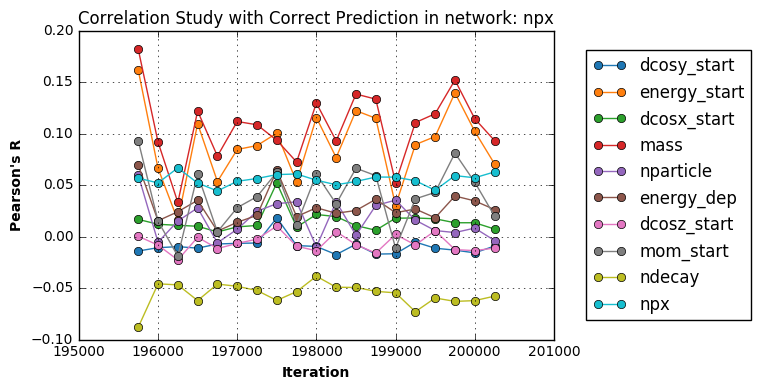

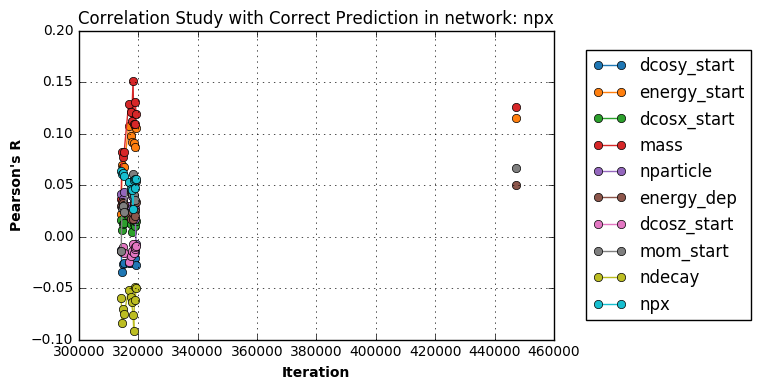

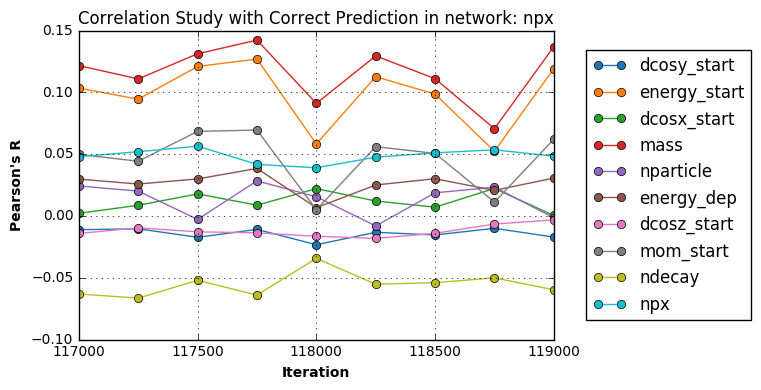

In [12]:
for analysis in analysis_results:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    index=0
    for label in analysis:
        if label == 'name' or label == 'iter': continue
        plt.plot(analysis['iter'], analysis[label], marker='o', 
                 label="{}".format(label), color=colorTable(index*2))
        index+=1
    plt.grid()
    plt.ylabel('Pearson\'s R',fontweight='bold')
    plt.xlabel('Iteration',fontweight='bold')
    plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
        #leg_frame=leg.get_frame()
        #leg_frame.set_facecolor('white')
    plt.title('Correlation Study with Correct Prediction in network: {}'.format(label, analysis['name']))
    plt.tight_layout()
    plt.show()    